In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cross_validation import train_test_split

from IPython.display import HTML
from IPython.display import Image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Codigo para dibujar regiones de decision. Extraido de scikit-learn.org
def plot_decision_regions(clf,X,y, fig=None,title=''):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .05  # step size in the mesh
    x_min, x_max = X.values[:, 0].min() - .5, X.values[:, 0].max() + .5
    y_min, y_max = X.values[:, 1].min() - .5, X.values[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    if fig is None:
        plt.figure(figsize=(13, 6))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)

        plt.scatter(X.values[:, 0], X.values[:, 1], c=y.values,
                    cmap=plt.cm.Paired, edgecolors='k', linewidths=1.5, s=80)
        plt.title(title)
        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.xticks(())
        plt.yticks(())
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    else:
        fig.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

        fig.scatter(X.values[:, 0], X.values[:, 1], c=y.values,
                    cmap=plt.cm.Paired, edgecolors='k', linewidths=1.5, s=80)
        fig.set_title(title)
        fig.set_xlabel('Atributo 1')
        fig.set_ylabel('Atributo 2')
        fig.set_xticks(())
        fig.set_yticks(())
        fig.set_xlim(xx.min(), xx.max())
        fig.set_ylim(yy.min(), yy.max())

<img src="images/cover.png">

# ÍNDICE #
** 1. Introducción a *scikit-learn* ** <br/>
** 2. Clasificación ** <br/>
** 3. Regresión ** <br/>
** 4. Clustering ** <br/>
** 5. Selección de modelo ** <br/>
** 6. Reducción de dimensionalidad ** <br/>
** 7. Pipelines **

---------------------------------------------------------------------------------

# INTRODUCCIÓN A SCIKIT-LEARN #

### ¿Qué es *scikit-learn*? ###

* Biblioteca de análisis de datos y *machine learning*
* Desarrollada para Python 2 y 3 (escrita en una mezcla de Python, Cython, C y C++)
* Buen rendimiento (C-like performance en la mayoría de acciones)
* Posee numerosas implementaciones de algoritmos y modelos de machine learning
* Licencia BSD

### Ecosistema científico de Python ###
La biblioteca scikit-learn está perfectamente integrada en el ecosistema científico de Python
* NumPy:      Manipulación eficiente de arrays y álgebra lineal
* SciPy:      Extensa biblioteca para matemáticas, ciencia e ingeniería
* Matplotlib: Biblioteca de gráficos
* IPython/Jupyter:    Shell de Python (y otros lenguajes) sencillo y versátil
* Pandas:     Biblioteca de DataFrames para manipular tablas de forma sencilla

### Un vistazo rápido a la web... ###
<br/>
<center><img src="images/scikit_main.png"></center>

<center><img src="images/ml_map.png"></center>

## Algunas funciones importantes... ##

### Creación de conjuntos de datos sintéticos ###

En *scikit-learn* existe la posibilidad de crear conjuntos datos aleatorios personalizados para realizar pruebas. Existen varios métodos que permiten la creación de datos para clasificación, regresión, clustering... Algunos de los más comunes son: `datasets.make_blobs`, `datasets.make_classification` o `datasets.make_regression`

Mas info: [http://scikit-learn.org/stable/datasets/#sample-generators](http://scikit-learn.org/stable/datasets/#sample-generators)

In [3]:
# Creacion de muestras normalmente e isotropicamente distribuidas
dataset = make_blobs(n_samples=10,     # Numero de muestra aleatorias a crear
                     n_features=2,     # Numero de atributos
                     centers=2,        # Numero de centros (numero de gaussianas)
                     cluster_std=3.5,  # Desviacion tipica de los datos
                     random_state=2)   # Estado del generador de numeros aleatorios
print dataset

(array([[  2.87995368,  -3.3801111 ],
       [  0.6499872 ,  -1.45874732],
       [ -2.08012807,  -1.84107174],
       [  0.92629282,   2.81895212],
       [ -1.62429876,  -1.26196377],
       [ -7.55712651, -12.42759114],
       [  0.479983  , -13.83998367],
       [  1.89124614,  -4.75427882],
       [ -1.13471408, -13.39421442],
       [ -4.98293472, -12.66300202]]), array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0]))


### Dividir conjunto de datos en `train` y `test` ###

Para dividir nuestro conjunto de datos en datos de entrenamiento y datos de test, *scikit-learn* proporciona el método `cross_validation.train_test_split`. Podemos indicar el porcentaje de muestras que queramos para cada conjunto.

Más info: [http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [4]:
X = np.random.rand(1000,3)
y = np.random.rand(1000,1)

# Dividimos el conjunto de datos en: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print 'Longitud X: ' + str(len(X))
print 'Longitud X_train: ' + str(len(X_train))
print 'Longitud X_test: ' + str(len(X_test))

Longitud X: 1000
Longitud X_train: 800
Longitud X_test: 200


### Eliminar media y varianza del conjunto de datos ###

En la mayoría de los casos es necesario preprocesar nuestros eliminando la media y normalizando por la varianza. En lugar de tener que hacerlo a mano, *scikit-learn* nor proporciona la clase `StandardScaler`. Más info: [http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [5]:
print 'Media: '+str(np.mean(X_train))
print 'Desviacion tipica: '+str(np.std(X_train))

Media: 0.507738288534
Desviacion tipica: 0.287739247112


#### Normalizamos con `StandardScaler` ####

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std = StandardScaler();

In [8]:
std.fit(X_train);

In [9]:
std_X = std.transform(X_train);

#### Nueva media y desviación ####

In [10]:
print 'Media: '+str(np.round(np.mean(std_X)))
print 'Desviacion tipica: '+str(np.std(std_X))

Media: -0.0
Desviacion tipica: 1.0


---------------------------------------------------------------------------------

# CLASIFICACIÓN #

### Clasificación: ###
* Aprendizaje supervisado
* Disponemos de muestras **X** con sus etiquetas **y**
* La etiquetas **y** tienen valores discretos, y se denominan **clases**

*OBJETIVO:* entrenar un modelo a partir de **X** e **y** para ser capaces de clasificar correctamente nuevos datos de entrada **X_new**

En **scikit-learn** disponemos de tres métodos básicos para clasificación dado un `modelo`:

* **`modelo.fit(X, y):`** ajuste de los parámetros del modelo a los datos

* **`modelo.predict(X):`** predicción de los valores de salida para datos nuevos

* **`modelo.score(X, y):`** método de evaluación de la predicción

Existe un amplio catálogo de modelos implementados. Estos son algunos ejemplos:

 Algoritmo           | Módulo                           | Multiclase | Comentario
 ------------------- | :-----------------------------   | ----------   ----------
 Regresión Logística | `linear_model.LogisticRegresion` | OvR        | Emplea la biblioteca [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)
 Árboles de decisión | `tree.DecisionTreeClassifier`    | Inherente  | Clasificador de reglas
 K Nearest Neighbors | `neighbors.KNeighborsClassifier` | Inherente  | Clasificador en función de la clase de las muestras más cercanas
 Naïve Bayes         | `naive_bayes.GaussianNB`         | Inherente  | Clasificador bayesiano que asume independencia entre atributos
 Perceptrón          | `linear_model.perceptron`        | OvR        | Clasificador linear de margen
 SVM (sólo lineal)   | `svm.LinearSVC`                  | OvR        | Emplea la biblioteca [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/). Sólo *kernel lineal*
 SVM                 | `svm.SVC`                        | OvO        | Emplea la biblioteca [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/). Todo tipo de *kernel*

## EJEMPLOS ##

### *Ejemplo 1: Clasificación mediante Regresión Logística* ###

#### Disponemos un conjunto de datos generado sintéticamente ####

In [11]:
dataset = make_blobs(n_samples=1000,n_features=2,
                     centers=2,cluster_std=3.5,random_state=2)
X = pd.DataFrame(dataset[0])
y = pd.Series(dataset[1])

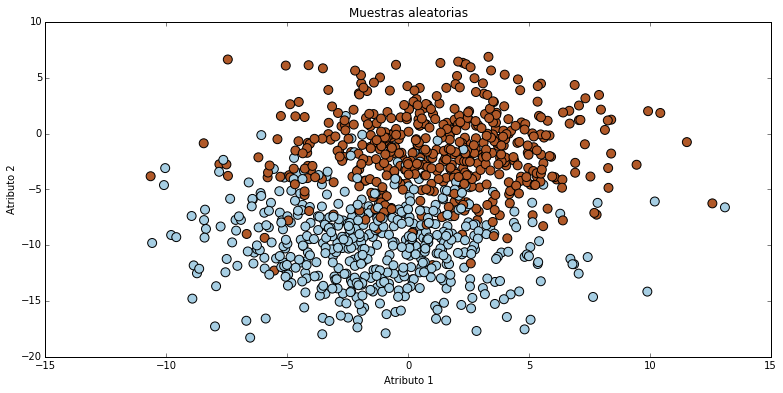

In [12]:
plt.figure(figsize=(13,6))
plt.scatter(X.values[:, 0], X.values[:, 1], c=y.values, cmap=plt.cm.Paired,
            edgecolors='k', s=80)
plt.title('Muestras aleatorias'); plt.xlabel('Atributo 1'); plt.ylabel('Atributo 2');

#### Dividimos el conjunto de datos en `train` y `test` ####

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 20% test

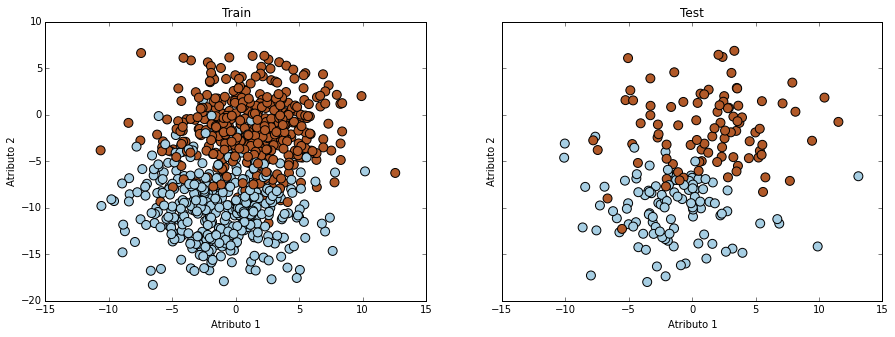

In [14]:
f,ax = plt.subplots(1,2,figsize=((15,5)),sharex=True,sharey=True)
ax[0].scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train.values, cmap=plt.cm.Paired,
            edgecolors='k', s=80)
ax[0].set_title('Train'); ax[0].set_xlabel('Atributo 1'); ax[0].set_ylabel('Atributo 2');
ax[1].scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test.values, cmap=plt.cm.Paired,
            edgecolors='k', s=80)
ax[1].set_title('Test'); ax[1].set_xlabel('Atributo 1'); ax[1].set_ylabel('Atributo 2');

#### Aplicamos Regresión Logística a los datos de entrenamiento####

In [15]:
# Importamos la biblioteca
from sklearn.linear_model import LogisticRegression

In [16]:
# Instanciamos el modelo
lr = LogisticRegression(C = 1,          # Parámetro de regularización
                        penalty = 'l2') # Tipo de regularización

In [17]:
# Entrenamos el clasificador
lr.fit(X=X_train,             # Datos de entrenamiento
       y=y_train)             # Etiquetas asociadas a los datos de entrenamiento

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

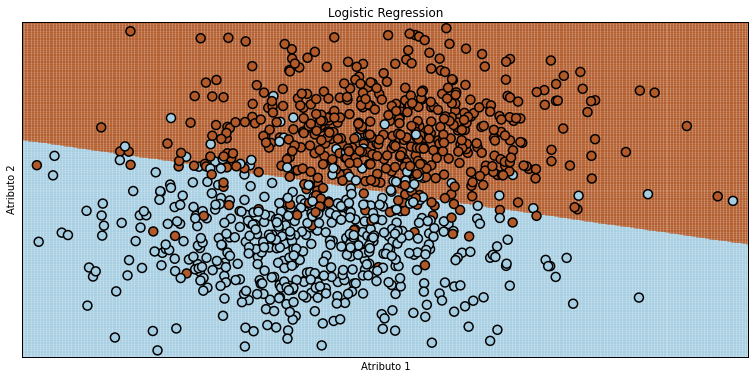

In [18]:
plot_decision_regions(lr,X,y,title='Logistic Regression')

#### Predecimos las etiquetas para el conjunto de test ####

In [19]:
labels = lr.predict(X_test)
print labels

[0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1]


#### Score para el conjunto de test ####

In [20]:
score = lr.score(X_test, y_test)
print 'Score test: '+str(score)

Score test: 0.91


### *Ejemplo 2: Otros clasificadores* ###

#### Decision Tree ####

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', # Criterio de división
                            max_depth=4,         # Maxima profundidad
                            min_samples_split=5, # Muestras por division
                            min_samples_leaf=5); # Muestras por hoja

dt.fit(X=X_train, y=y_train);

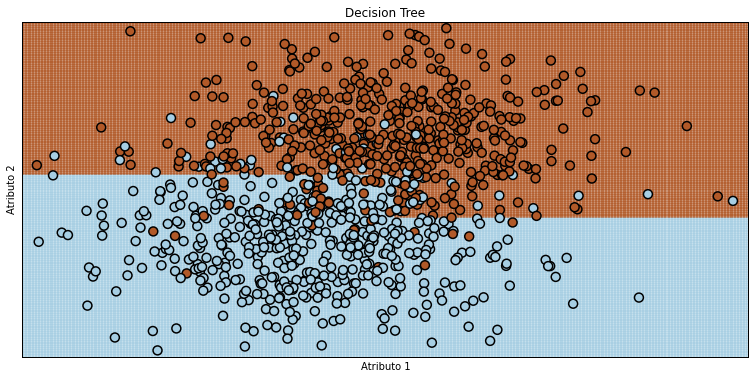

In [22]:
plot_decision_regions(dt,X,y,title='Decision Tree')

##### Exportar gráfico del árbol #####

In [23]:
from sklearn.externals.six import StringIO  
from sklearn import tree
import pydot

dot_data = StringIO()
tree.export_graphviz(dt,out_file=dot_data,
                     feature_names=['Attr1','Attr2'],max_depth=1)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('images/tree.png');

<center><img src="images/tree.png"></center>

#### K Nearest Neighbors ####

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7,      # Numero de vecinos a tener en cuenta
                           weights='uniform',  # Pesos en funcion de dist.
                           algorithm='brute',  # Algoritmo de busqueda
                           metric='minkowski', # Metrica para las distancias
                           p=2)                # 1:manhattan, 2:euclidea

knn.fit(X=X_train, y=y_train);

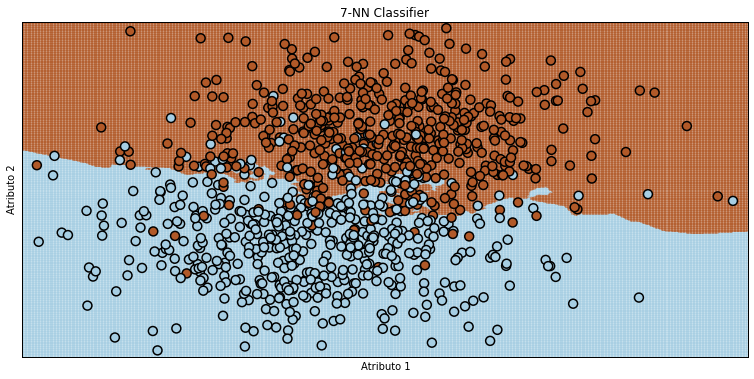

In [25]:
plot_decision_regions(knn,X,y,title='7-NN Classifier')

#### Naïve Bayes ####

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X=X_train, y=y_train);

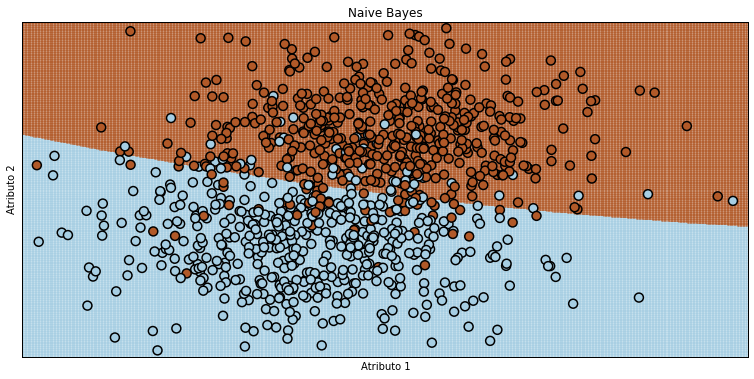

In [27]:
plot_decision_regions(nb,X,y,title='Naive Bayes')

#### Linear SVM with `liblinear` ####

In [28]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC(C=1,           # Hiperparametro de regularizacion
                 penalty='l2',  # Regularizacion 'l2' o 'l1'
                 dual=True)     # Minimiz. dual o primal

lsvm.fit(X=X_train, y=y_train);

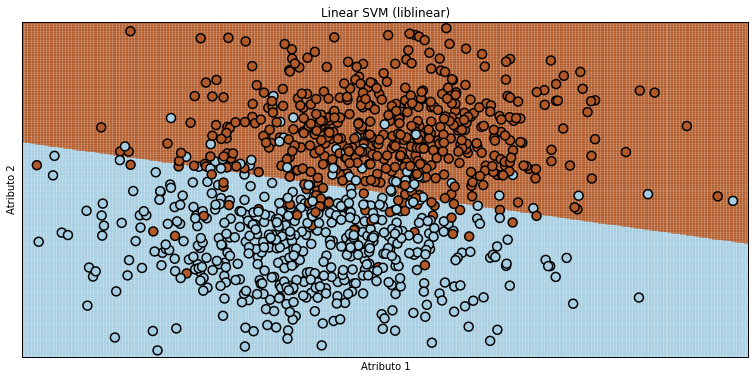

In [29]:
plot_decision_regions(lsvm,X,y,title='Linear SVM (liblinear)')

#### 2-Polinomic Kernel SVM with `libsvm` ####

In [30]:
from sklearn.svm import SVC

psvm = SVC(C=1,               # Hiperparametro de regularizacion
           kernel='poly',     # Kernel polinomico
           degree=2,          # Grado del kernel
           probability=False) # Salida no probabilistica

psvm.fit(X=X_train, y=y_train);

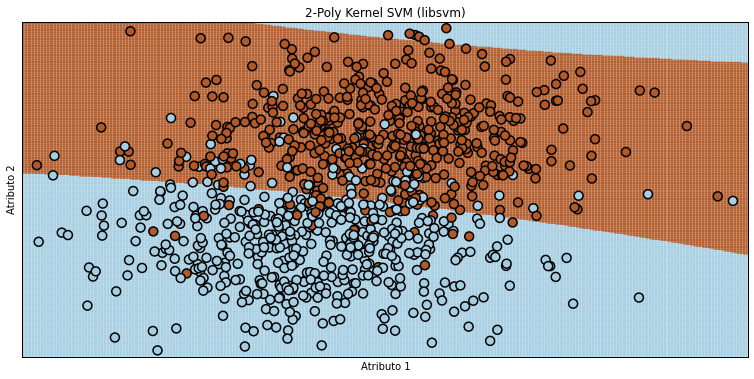

In [31]:
plot_decision_regions(psvm,X,y,title='2-Poly Kernel SVM (libsvm)')

#### Gaussian Kernel (RBF) SVM with `libsvm` ####

In [32]:
from sklearn.svm import SVC

gsvm = SVC(C=1,               # Hiperparametro de regularizacion
           kernel='rbf',      # Kernel gaussiano (función de base radial)
           gamma=0.1,         # Grado del kernel
           probability=False) # Salida no probabilistica

gsvm.fit(X=X_train, y=y_train);

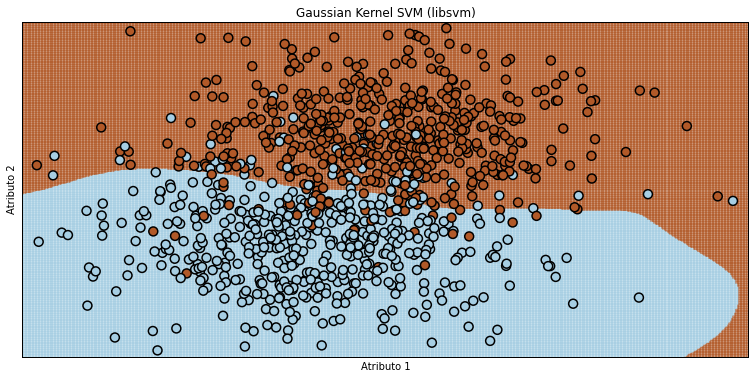

In [33]:
plot_decision_regions(gsvm,X,y,title='Gaussian Kernel SVM (libsvm)')

#### Obtener el score de los clasificadores sobre el `test` ####

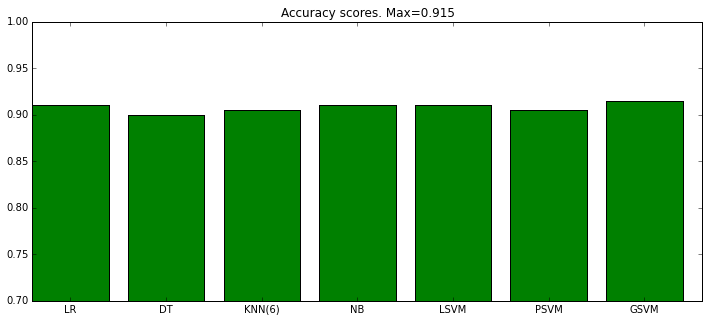

In [34]:
scores = [];
scores.append(lr.score(X_test,y_test));
scores.append(dt.score(X_test,y_test));
scores.append(knn.score(X_test,y_test));
scores.append(nb.score(X_test,y_test));
scores.append(lsvm.score(X_test,y_test));
scores.append(psvm.score(X_test,y_test));
scores.append(gsvm.score(X_test,y_test));
names = ['LR','DT','KNN(6)','NB','LSVM','PSVM','GSVM']

plt.figure(figsize=(12,5))
plt.bar(range(len(scores)),scores,color='g');
plt.xticks(np.arange(len(scores))+0.4,names);
plt.ylim((0.7,1)); plt.title('Accuracy scores. Max=' + str(max(scores)));

## Ensemble Learning ##

Scikit-learn también incorpora técnicas de ensamblado:

 Técnica                     | Módulo                                | Comentario
 -------------------         | :-----------------------------------  | ---------------------------------------
 Bagging                     | `ensemble.BaggingClassifier`          | Media de varias ejecuciones del estimador sobre diferentes subconjuntos de datos 
 Random Forests              | `ensemble.RandomForestsClassifier`    | Bagging de árboles de decisión
 Extremelly Randomized Trees | `ensemble.ExtraTreesClassifier`       | 
 ADABoost                    | `ensemble.AdaBoostClassifier`         | Adaptative Boosting
 Gradient Boosted Trees      | `ensemble.GradientBoostingClassifier` | Adaptative Boosting

### *Ejemplo: Clasificación del dataset con técnicas de emsembling* ###

#### Bagging ####

In [35]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC

bag = BaggingClassifier(LinearSVC(),              # Estimador
                        n_estimators=1000,        # Numero de estimadores
                        max_samples=0.8,          # Proporcion de muestras
                        max_features=1,           # Proporcion de atributos
                        bootstrap=True,           # Reemplazo en muestras
                        bootstrap_features=False, # Reemplazo en atributos
                        oob_score=True,           # Calcular score out-of-bag
                        n_jobs=-1,                # Paralelizar tarea (-1: usar todos los cores)
                        random_state=0)

In [36]:
bag.fit(X_train, y_train);

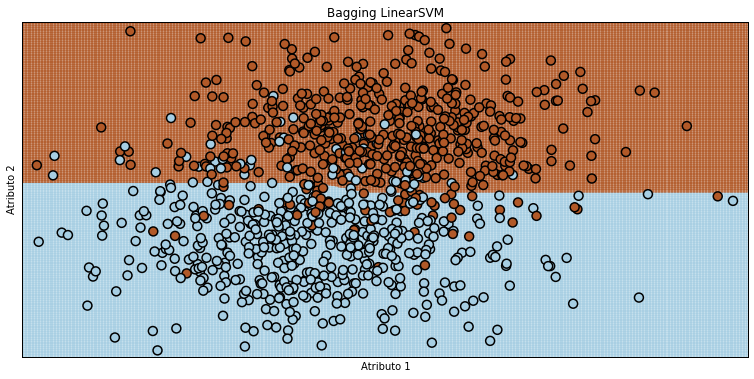

In [37]:
plot_decision_regions(bag,X,y,title='Bagging LinearSVM')

#### Random Forests y Extremely Randomized Trees ####

In [38]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC

rf = RandomForestClassifier(n_estimators=1000);
etree = ExtraTreesClassifier(n_estimators=1000); 

In [39]:
rf.fit(X_train, y_train);
etree.fit(X_train, y_train);

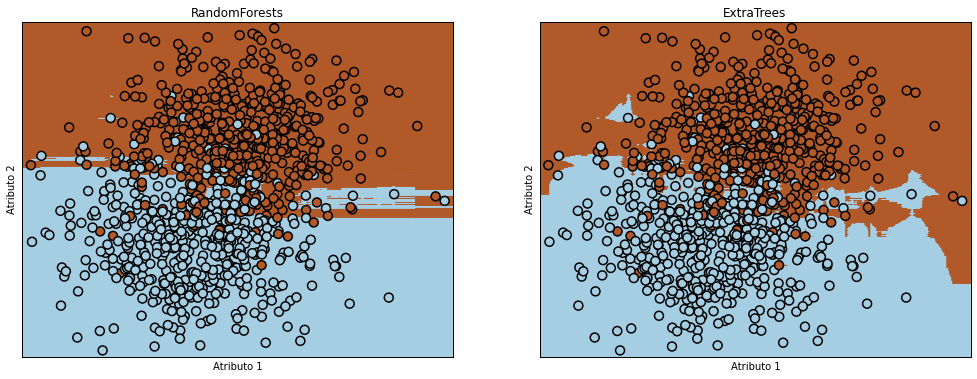

In [40]:
f,ax = plt.subplots(nrows=1, ncols=2, figsize=(17,6))
plot_decision_regions(rf,X,y,fig=ax[0],title='RandomForests')
plot_decision_regions(etree,X,y,fig=ax[1],title='ExtraTrees')

#### ADABoost ####

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ab = AdaBoostClassifier(n_estimators=1000,  # Numero de estimadores
                        learning_rate=1)    # Tasa de aprendizaje

In [42]:
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=1000, random_state=None)

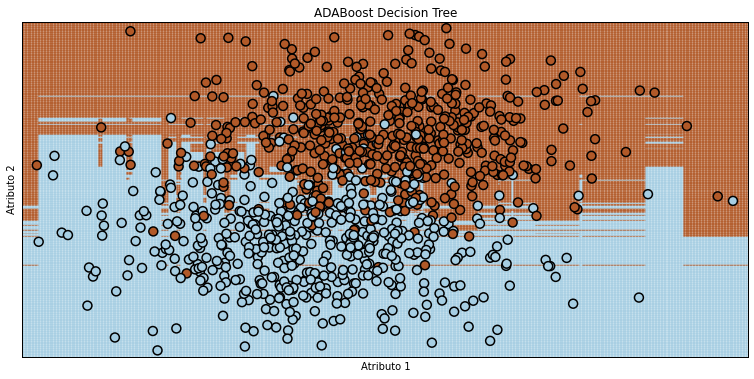

In [43]:
plot_decision_regions(ab,X,y,title='ADABoost Decision Tree')

#### Scores ####

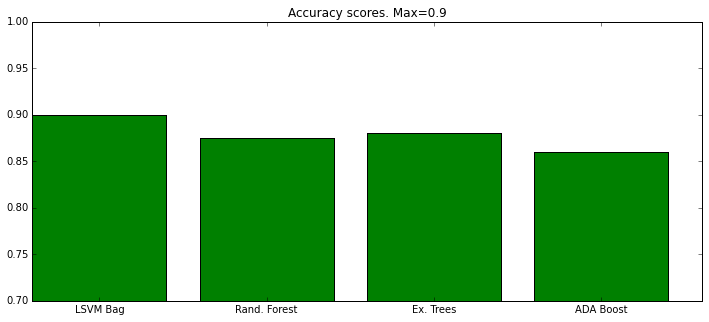

In [44]:
scores = [];
scores.append(bag.score(X_test,y_test));
scores.append(rf.score(X_test,y_test));
scores.append(etree.score(X_test,y_test));
scores.append(ab.score(X_test,y_test));
names = ['LSVM Bag','Rand. Forest','Ex. Trees','ADA Boost']

plt.figure(figsize=(12,5))
plt.bar(range(len(scores)),scores,color='g');
plt.xticks(np.arange(len(scores))+0.4,names);
plt.ylim((0.7,1)); plt.title('Accuracy scores. Max='+str(max(scores)));

-------------------------------------------------------------------------------------------------------------

# REGRESIÓN #

### Regresión: ###
* Aprendizaje supervisado
* Disponemos de muestras **X** con sus etiquetas **y**
* Las etiquetas **y** tienen valores **continuos**

*OBJETIVO:* entrenar un modelo a partir de **X** e **y** para ser capaces de clasificar correctamente nuevos datos de entrada **X_new**

Al igual que en clasificación, en regresión disponemos de los tres métodos básicos para aplicar lo modelos

* **`modelo.fit(X, y):`** ajuste de los parámetros del modelo a los datos

* **`modelo.predict(X):`** predicción de los valores de salida para datos nuevos

* **`modelo.score(X, y):`** método de evaluación de la predicción

 Algoritmo               | Módulo                              | Comentario
 -------------------     | :-----------------------------      | ----------
 Mínimos Cuadrados       | `linear_model.LinearRegression`     | Regresión lineal con Least Squares
 Ridge Regression        | `linear_model.Ridge`                | Least Squares con regularización L2
 Lasso Regression        | `linear_model.Lasso`                | Least Squares con regularización L1
 Elastic Net             | `linear_model.ElasticNet`           | Least Squares con regularización L1 y L2
 KNN Regression          | `neighbors.KNeighborsRegressor`     | KNN adaptado a regresión (filtro de media)
 Radius NN Regression    | `neighbors.RadiusNeighborsRegressor`| NN teniendo en cuenta el radio y no el número de vecinos de la muestra
 Regression Trees        | `tree.DecisionTreeRegressor`        | Árboles de decisión para regresión.

(Cont.)
 
 Algoritmo               | Módulo                              | Comentario
 -------------------     | :-----------------------------      | ----------
 Linear SVM Regresión    | `svm.LinearSVR`                     | Implementación de SVM para regresión. Escala mejor para un gran número de muestras. Emplea la biblioteca [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)
 SVM Regression          | `svm.SVR`                           | Implementación de SVM para regresión. Admite kernels. Emplea la biblioteca [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)
 Isotonic Regrssion      | `isotonic.IsotonicRegression`       | Regresión diseñada para datos con valor creciente.
 Procesos Gaussianos     | `gaussian_process.GaussianProcess`  | Método de regresión con salida probabilística
 *Regresion Polinomica*  | `preprocessing.PolynomialFeatures`  | Expansión de los datos para regresión no lineal

## EJEMPLOS ##

### *Ejemplo 1: Regresión lineal y polinómica* ####

#### Creamos un conjunto de datos manualmente ####

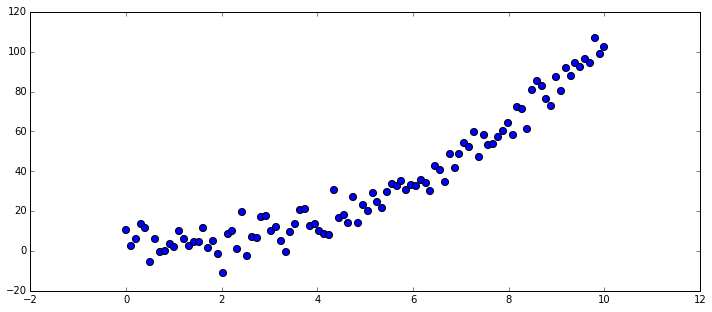

In [45]:
np.random.seed(0)
x = np.linspace(0,10,100)
y = x**2 + np.random.normal(scale=6, size=100)
plt.figure(figsize=(12,5))
plt.scatter(x,y, s=50)
pass

#### Regresión Lineal ####

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x[:,None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

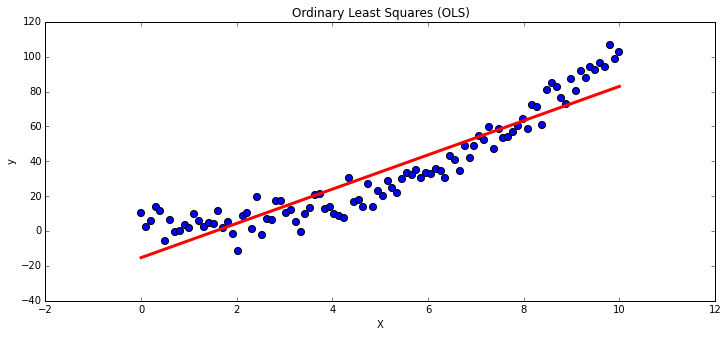

In [47]:
plt.figure(figsize=(12,5))
plt.scatter(x[:,None],y, s=50)
plt.plot(x[:,None],reg.predict(x[:,None]), linewidth=3,c='r')
plt.xlabel('X'); plt.ylabel('y')
plt.title('Ordinary Least Squares (OLS)')
pass

##### Score #####

In [48]:
print 'Score: '+str(reg.score(x[:,None], y))

Score: 0.863139798293


##### Ecuación de la recta ajustada a los datos #####

In [49]:
ec = 'y(x) = '+ str(reg.intercept_) + ' + ' + str(reg.coef_[0]) + 'x';

$$y(x)=-15.24+9.82x$$

#### Regresión Polinómica ####

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
# Crear transformador polinómico
poly2 = PolynomialFeatures(degree=2)

In [52]:
# Ajustar y Expandir a orden 2 (x1*x1)
x2 = poly2.fit_transform(x[:,None])

In [53]:
# Aplicar Regresion Lineal normal sobre los datos transformados
reg2 = LinearRegression();
reg2.fit(x2, y);

In [54]:
def plot_figure():
    plt.figure(figsize=(12,5))
    plt.scatter(x,y, s=50, linewidths=1)
    plt.plot(x[:,None],reg.predict(x[:,None]), linewidth=3,c='r', label='lineal')
    plt.plot(x[:,None],reg2.predict(x2), linewidth=3,c='m', label='poly 2')
    plt.xlabel('X'); plt.ylabel('y'); plt.legend(); plt.title('Polynomial Regression');

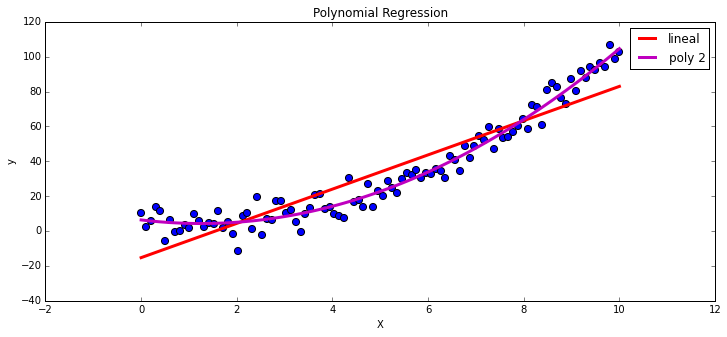

In [55]:
plot_figure()

##### Score #####

In [56]:
print 'Score: '+str(reg2.score(x2, y))

Score: 0.967672868473


##### Ecuación de la curva ajustada a los datos #####

In [57]:
ec = 'y(x) = '+ str(reg2.intercept_) +' + '+ str(reg2.coef_[0]) + 'x + ' + str(reg2.coef_[1])+'x²';

$$y(x)=6.37+0x-3.28x^{2}$$

### *Ejemplo 2: Regresión lineal con regularización* ###

#### Conjunto de datos ####

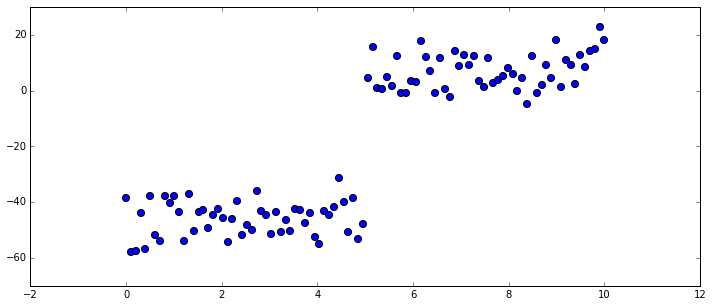

In [58]:
x = np.linspace(0,10,100)
y = x + np.random.normal(scale=6, size=100); y[:50] = y[:50]-50
plt.figure(figsize=(12,5)); plt.scatter(x,y, s=50);

#### Ridge, Lasso y Elastic Net ####

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lr = LinearRegression();                lr.fit(x[:,None], y);
rid = Ridge(alpha=20);                  rid.fit(x[:,None], y);
lass = Lasso(alpha=20);                 lass.fit(x[:,None], y);
en = ElasticNet(alpha=20,l1_ratio=0.5); en.fit(x[:,None], y);

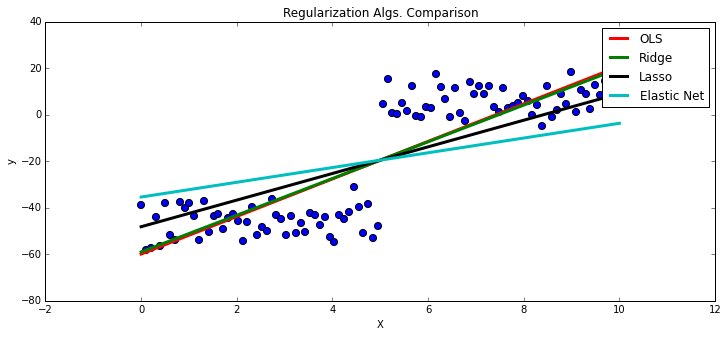

In [60]:
plt.figure(figsize=(12,5))
plt.scatter(x[:,None],y, s=50)
plt.plot(x[:,None],lr.predict(x[:,None]), linewidth=3,c='r', label='OLS')
plt.plot(x[:,None],rid.predict(x[:,None]), linewidth=3,c='g', label='Ridge')
plt.plot(x[:,None],lass.predict(x[:,None]), linewidth=3,c='k', label='Lasso')
plt.plot(x[:,None],en.predict(x[:,None]), linewidth=3,c='c', label='Elastic Net')
plt.xlabel('X'); plt.ylabel('y'); plt.legend()
plt.title('Regularization Algs. Comparison');

-------------------------------------------------------------------------------------------------------------

# CLUSTERING #

### Clustering:
* Aprendizaje no supervisado
* Disponemos de muestras **X** sin etiquetar

*OBJETIVO:* entrenar un modelo a partir de **X** para averiguar la estructura de los datos agrupándolos en clusters. Queremos asignar **y** a los datos **X**

Disponemos del mismo API que para clasificación

* `modelo.fit(X): ajuste de los parámetros del modelo a los datos`

* `modelo.predict(X): predicción de los valores de salida para datos nuevos`

Existe un amplio conjunto de algoritmos implementados

 Algoritmo                   | Módulo                             
 -------------------         | :-----------------------------     
 K-Means                     | `cluster.KMeans`  
 Affinity propagation        | `cluster.AffinityPropagation`  
 Mean-shift                  | `cluster.MeanShif`
 Spectral clustering         | `cluster.SpectralClustering`
 Agglomerative clustering    | `cluster.AgglomerativeClustering`   
 DBSCAN                      | `cluster.DBSCAN`   
 Gaussian mixtures           | `cluster.GMM`      
 Birch                       | `cluster.Birch` 

### *Ejemplo: Clustering con k-means* ###

#### Creamos un conjunto de datos ####

In [61]:
data = make_blobs(n_samples=1000, cluster_std=3, random_state=1)
X = pd.DataFrame(data[0])
true_y = pd.Series(data[1])

In [62]:
def plot_data():
    plt.figure(figsize=(12,5))
    plt.scatter(X.values[:, 0], X.values[:, 1], edgecolors='k', s=80, cmap=plt.cm.Accent, linewidths=1)
    plt.title('Muestras aleatorias')
    plt.xlabel('Atributo 1'); plt.ylabel('Atributo 2');

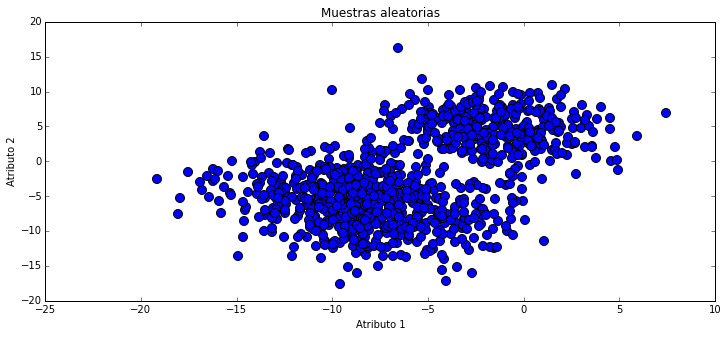

In [63]:
plot_data()

#### Aplicamos el algoritmo K-Means ####

In [64]:
from sklearn.cluster import KMeans

clusters = range(2,6)
labels = []

for i,c in enumerate(clusters):
    # Crear modelo 
    clu = KMeans(n_clusters=c,   # Numero de clusters
                 init='random',  # Inicializacion del alg.
                 n_jobs=-1)
    
    # Entrenar modelo
    clu.fit(X)
    
    # Extraer etiquetas asignadas
    labels.append(clu.labels_);

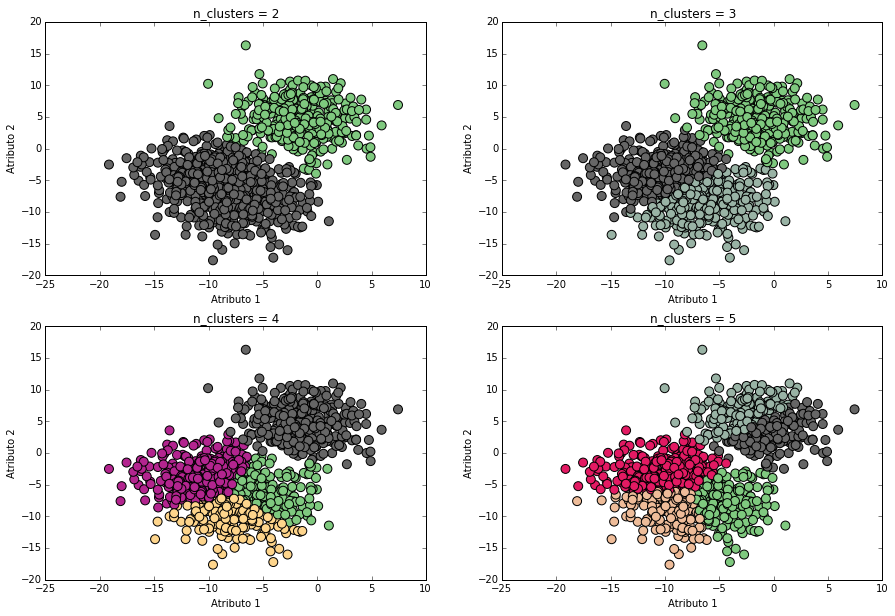

In [65]:
f, axs = plt.subplots(2,2,figsize=(15,10))
axs = axs.ravel()
for i,c in enumerate(clusters):
    axs[i].scatter(X.values[:, 0], X.values[:, 1], c=labels[i],
                    cmap=plt.cm.Accent, edgecolors='k', s=80)
    axs[i].set_title('n_clusters = '+ str(c))
    axs[i].set_xlabel('Atributo 1'); axs[i].set_ylabel('Atributo 2')

-------------------------------------------------------------------------------------------------------------

# SELECCIÓN DE MODELO #

## Validación cruzada ##
* Empleado para optimizar hiperparámetros (con la C de LogisticRegression o SVC)
* Dividir conjunto de entrenamiento en partes
* Emplear un parte para validar el modelo
* Emplear resto de partes para entrenar el modelo
* Entrenar-validar tantas veces con partes haya
* El score final es la media de los scores de cada parte

## Validación cruzada ##
En muchas ocasiones, a parte de los parámetros a optimizar, el modelo presenta diferentes parámetros libres llamados **hiperparámetros**. Estos parámetros juegan un papel importante en el rendimiento del modelo por lo que es muy importante escogerlos con cuidado. Para seleccionar el valor de estos parámetros se suelen emplear diferentes técnicas de **validación**. La validación consiste en añadir una división más en el conjunto de datos de tal forma que dispongamos de conjunto de entrenamiento, de validación y de test. De esta manera el conjunto de validación se puede emplear para probar diferentes valores de los hiperparámetros y escoger aquellos que mejor rendimiento proporcionen.

El problema de dividir el conjunto de datos en tres partes es que nos quedan muy pocos datos para entrenar el modelo o validarlo por lo que un técnica muy extendida es la de la **validación cruzada**. La validación cruzada consiste en dividir el conjunto de entrenamiento en varias partes, de tal forma que empleemos algunas de esas partes para entrenar y las otras para validar, dejando a un lado el conjunto de test para medir el rendimiento final de nuestro modelo.

#### Ejemplo: parámetro C de LogisticRegression ####

<center><img src="images/fold_cv.png"></center>
<cite>Fuente: https://neeravbasant.wordpress.com/2015/01/15/evils-of-overfitting-and-how-to-minimize-them/</cite>

 Algoritmo             | Módulo                              | Comentario
 -------------------   | :-----------------------------      | ----------
 KFold                 | `cross_validation.KFold`            | Particionado del conjunto de datos en K trozos
 KFold Estratificado   | `cross_validation.StratifiedKFold`  | Particionado 'justo' del conjunto de datos en K trozos
 Leave One Out         | `cross_validation.LeaveOneOut`      | 1 muestra para test, N-1 muestras para train
 Leave P Out           | `cross_validation.LeavePOut`        | P muestras para test, N-P muestras para train
 Leave One Label Out   | `cross_validation.LeaveOneLabelOut` | Escoge para entrenar las muestras que no pertenezcan a una determinada clase
 Leave P Label Out     | `cross_validation.LeavePLabelOut`   | Escoge para entrenar las muestras que no pertenezcan a P determinadas clases
 Particion aleatoria   | `cross_validation.ShuffleSplit`     | Muestras extraídas aleatoriamente. Parecido a KFold

(Cont.)

 Algoritmo             | Módulo                              | Comentario
 -------------------   | :-----------------------------      | ----------
 Grid Search           | `grid_search.GridSearchCV`          | Búsqueda automática de hiperparámetros por fuerza bruta
 Randomized Search     | `grid_search.RandomizedSearchCV`    | Búsqueda automática de hiperparámetros por aleatorización
 Validadores especializados| `***`                               | Implementación específica de algunos clasificadores/regresores para validación cruzada. Es mucho más rápido que GridSearchCV.

#### K-Fold ####

In [66]:
from sklearn.cross_validation import KFold

K = 3
n_muestras = 6
skf = KFold(n=n_muestras, # Numero de muestras en el conjunto de datos
            n_folds=K)    # Numero de divisiones(folds)

for train_index, test_index in skf:
    print("%s \t %s" % (train_index, test_index))

[2 3 4 5] 	 [0 1]
[0 1 4 5] 	 [2 3]
[0 1 2 3] 	 [4 5]


#### Stratified K-Fold ####

In [67]:
from sklearn.cross_validation import StratifiedKFold

K = 5
sample_y = [1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3]
skf = StratifiedKFold(y=sample_y, # Pasamos las etiquetas para saber el porcentaje de cada clase
                      n_folds=K)
for train_index, test_index in skf:
    print("%s \t %s" % (train_index, test_index))

[ 1  2  3  4  8  9 10 11 12 13 14 15 17 18 19 20] 	 [ 0  5  6  7 16]
[ 0  2  3  4  5  6  7 10 11 12 13 14 15 16 18 19 20] 	 [ 1  8  9 17]
[ 0  1  3  4  5  6  7  8  9 12 13 14 15 16 17 19 20] 	 [ 2 10 11 18]
[ 0  1  2  4  5  6  7  8  9 10 11 14 15 16 17 18 20] 	 [ 3 12 13 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 16 17 18 19] 	 [ 4 14 15 20]


#### Leave-One-Out ####

In [68]:
from sklearn.cross_validation import LeaveOneOut

K = 10
n_muestras = 5
loo = LeaveOneOut(n=n_muestras)
for train_index, test_index in loo:
    print("%s \t %s" % (train_index, test_index))

[1 2 3 4] 	 [0]
[0 2 3 4] 	 [1]
[0 1 3 4] 	 [2]
[0 1 2 4] 	 [3]
[0 1 2 3] 	 [4]


### *Ejemplo 1: buscar el mejor valor para C en una Regresión Logística* ###

#### Crear conjunto de datos y dividir en `train` y `test` ####

In [69]:
dataset = make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=3.5,random_state=2)
X = pd.DataFrame(dataset[0])
y = pd.Series(dataset[1])

In [70]:
def plot_data():
    plt.figure(figsize=(12,5))
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y.values, cmap=plt.cm.Paired,
                edgecolors='k', s=80, linewidths=1)
    plt.title('Muestras aleatorias'); plt.xlabel('Atributo 1'); plt.ylabel('Atributo 2');

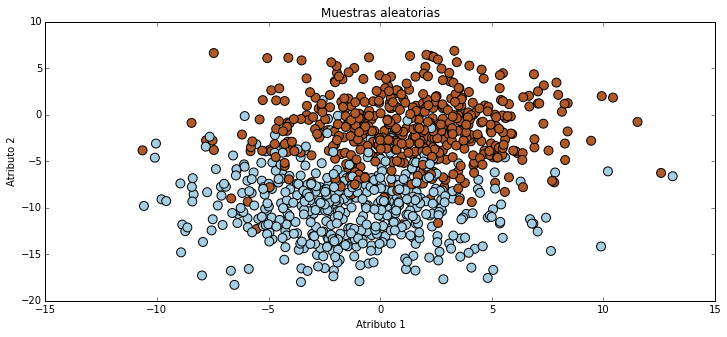

In [71]:
plot_data()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Validación del dataset con `StratifiedKFold` para `LogisticRegression` ####

In [73]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [74]:
# Tipo de validacion cruzada
K = 10
kf = StratifiedKFold(y_train, n_folds=K)

In [75]:
# Posibles valores para C
C = np.logspace(-3,3,10)

# Variables para almacenar los scores
val_accuracy = np.zeros((K,len(C)))

In [76]:
C = np.round(C,3)

In [77]:
# Iterar sobre las 'Cs' y los 'folds'
for i,c in enumerate(C):
    clf = LogisticRegression(C=c)
    for j,(train, val) in enumerate(kf):
        xtrain, ytrain = X_train.iloc[train], y_train.iloc[train]
        xval, yval = X_train.iloc[val], y_train.iloc[val]
        
        clf.fit(xtrain,ytrain)
        val_accuracy[j,i] = clf.score(xval,yval)
        
val_accuracy = pd.DataFrame(val_accuracy, columns=C)

#### Matriz con los scores en todos los `folds` por cada `C` ####

In [78]:
val_accuracy = np.round(val_accuracy,2)

In [79]:
val_accuracy

0.001     0.005     0.022     0.100     0.464     2.154     10.000    \
0      0.74      0.77      0.83      0.84      0.86      0.88      0.88   
1      0.78      0.86      0.90      0.90      0.91      0.91      0.91   
2      0.75      0.81      0.85      0.89      0.90      0.90      0.90   
3      0.78      0.84      0.86      0.89      0.90      0.90      0.89   
4      0.71      0.82      0.88      0.89      0.90      0.89      0.89   
5      0.78      0.79      0.86      0.89      0.90      0.90      0.90   
6      0.66      0.71      0.80      0.86      0.88      0.86      0.86   
7      0.74      0.81      0.90      0.90      0.88      0.86      0.86   
8      0.74      0.79      0.85      0.85      0.85      0.85      0.85   
9      0.82      0.89      0.90      0.91      0.92      0.92      0.92   

   46.416    215.443   1000.000  
0      0.88      0.88      0.88  
1      0.91      0.91      0.91  
2      0.90      0.90      0.90  
3      0.89      0.89      0.89  
4      0.89      0.89      0.89  
5      0.90      0.90      0.90  
6      0.86      0.86      0.86  
7      0.86      0.86      0.86  
8      0.85      0.85      0.85  
9      0.92      0.92      0.92

#### Extraer media de todos los `folds` ####

In [80]:
# Calcular media para todas las Cs
val_accuracy_mean = pd.Series(val_accuracy.mean(axis=0), index=C)

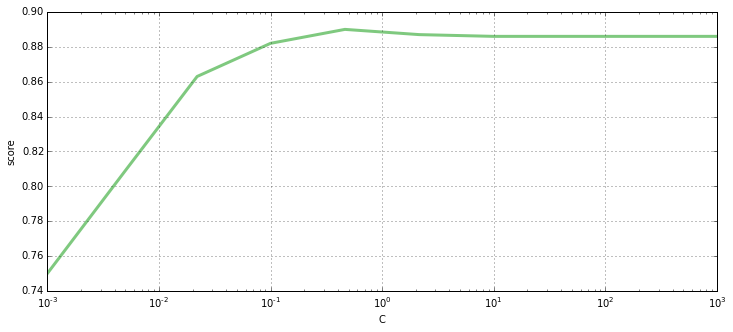

In [81]:
val_accuracy_mean.plot(figsize=(12,5), logx=True,  linewidth=3, grid=True, colormap=plt.cm.Accent)
plt.xlabel('C'); plt.ylabel('score');

In [82]:
# Mejor score
print 'Best C:\t'+ str(C[np.argmax(val_accuracy_mean.values)])
print 'Score:\t'+ str(max(val_accuracy_mean))

Best C:	0.464
Score:	0.89


#### Podemos ahorrarnos el bucle de validación anterior con...  ¡¡ `GridSearchCV` !! ####

#### `GridSearchCV` nos permite hacer validación cruzada ###

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

# Validador a utilizar
kf = StratifiedKFold(y_train, n_folds=10)

# Parametros a validar
param_grid = [
  {'C': np.logspace(-3,3,10), 'penalty': ['l2']}
]

In [84]:
# Instanciar estimador y GridSearchCV
clf = LogisticRegression()
gs = GridSearchCV(estimator=clf,         # Estimador
                  param_grid=param_grid, # Parametros a validar
                  scoring='accuracy',     # Funcion de score a optimizar
                  cv=kf)                 # Validador

In [85]:
# Entrenar Grid
gs.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid=[{'penalty': ['l2'], 'C': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03])}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

#### Parámetros óptimos encontrados ###

In [86]:
gs.best_estimator_

LogisticRegression(C=0.46415888336127775, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [87]:
gs.best_params_

{'C': 0.46415888336127775, 'penalty': 'l2'}

In [88]:
gs.best_score_

0.89000000000000001

#### Score sobre el conjunto de `test` ####

In [89]:
gs.best_estimator_.score(X_test,y_test)

0.91000000000000003

### PROBLEMA: `GridSearchCV` es muy costoso computacionalmente ###

### Validadores específicos ###
Muchos algoritmos tienen su propia implementación de la validación cruzada para buscar hiperparámetros.

`linear_model.ElasticNetCV, linear_model.LarsCV, linear_model.LassoCV, linear_model.LogisticRegressionCV, linear_model.RidgeCV`...

Estas implementaciones están `optimizadas` para el propio estimador y suelen ser mucho más rápidas que la búsqueda con GridSearchCV

### *Ejemplo 2: GridSearchCV vs LogisticRegressionCV* ###

In [90]:
# Grid Search #

K = 10
kf = StratifiedKFold(y_train, n_folds=K)
C = np.logspace(-3,3,500)
param_grid = [{'C': C, 'penalty': ['l2']}]

lr = LogisticRegression()
clf1 = GridSearchCV(estimator=lr, param_grid=param_grid, cv=kf)

%timeit clf1.fit(X_train, y_train)

1 loops, best of 3: 16.1 s per loop


In [91]:
# Logistic Regression CV #

from sklearn.linear_model import LogisticRegressionCV

K = 10
kf = StratifiedKFold(y_train, n_folds=K)
C = np.logspace(-3,3,500)

clf2 = LogisticRegressionCV(Cs=C, cv=kf)

%timeit clf2.fit(X_train, y_train)

1 loops, best of 3: 7.98 s per loop


---------------------------------------------------------------------------------

# REDUCCIÓN DE DIMENSIONALIDAD #

Cuando hablamos de *reducción de dimensionalidad* podemos referirnos a dos partes distintas:
* **Extracción de características:** Consisten en reducir la dimensión de los datos eliminando la redunciancia que hay en ellos. El conjunto de datos resultante tendrá atributos diferentes a los originales.
* **Selección de características:** Consiste en seleccionar aquellos atributos más valiosos para resolver nuestro problema. El conjunto de datos resultante será un subconjunto de los datos originales.

En **scikit-learn** disponemos de tres métodos básicos para para la reducción de dimensionalidad:

* **`modelo.fit(X, y):`** ajuste de los parámetros del modelo a los datos

* **`modelo.transform(X):`** transforma los datos de entrada según el modelo

* **`modelo.fit_transform(X, y):`** fit` + `transform

## Extracción de características ##

Existe un amplio catálogo de métodos de extracción. Algunos de ellos son:

 Algoritmo           | Módulo                           | Comentario
 ------------------- | :-----------------------------   | ---------------------------
 PCA                 | `decomposition.PCA`              | Análisis de Componentes Principales
 Incremental PCA     | `decomposition.IncrementalPCA`   | PCA para dataset grandes. Entrena de forma secuencial
 Kernel PCA          | `neighbors.KNeighborsClassifier` | Versión no lineal de PCA
 LDA                 | `lda.LDA`                        | Linear Discriminant Analysis
 CCA                 | `cross_decomposition.CCA`        | Canonical Correlation Analysis
 PLS                 | `cross_decomposition.PLSSVD`     | Partial Least Squares

### *Ejemplo 1: PCA en el dataset de Iris* ###

#### Extraemos la base de datos de Iris de scikit-learn ####

In [92]:
from sklearn.datasets import load_iris

In [93]:
# Cargar base de datos de Iris
dataset = load_iris()

In [94]:
# Extraer X e y
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target)

In [95]:
X.head(6)  # Mostrar 6 primeras muestras

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4

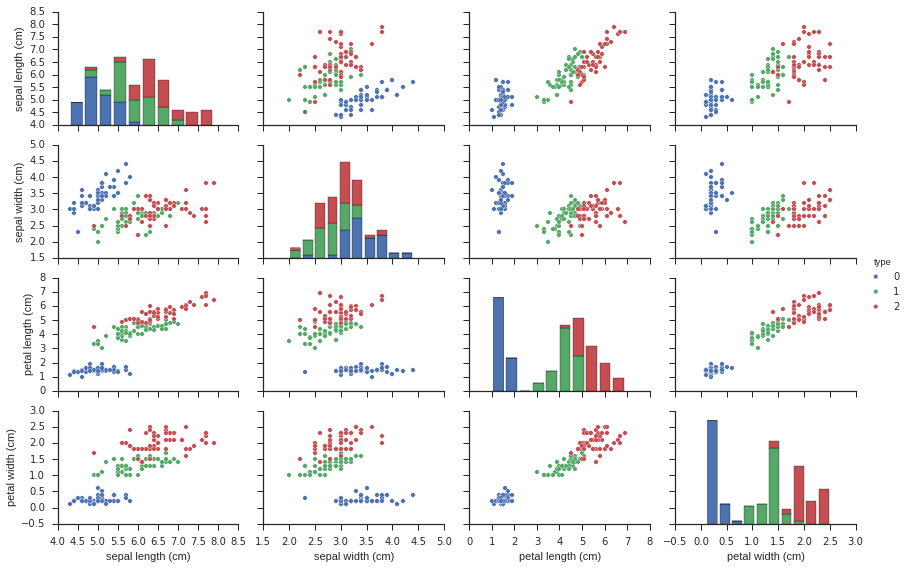

In [96]:
import seaborn as sns   # Biblioteca para graficas similar a matplotlib

xplot = X.copy()
xplot['type'] = y
sns.set_style('ticks');
sns.pairplot(xplot,hue='type',vars=dataset.feature_names,size=2,aspect=1.5);

#### Aplicar PCA para reducir la dimensión de 4 a 2 atributos ####

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components=2)

In [99]:
# Ajustar y Transformar conjunto de datos
reduced_X = pca.fit_transform(X)  

In [100]:
reduced_X = pd.DataFrame(reduced_X, columns=['Atributo1','Atributo2'])

In [101]:
reduced_X.head()

Atributo1  Atributo2
0  -2.684207  -0.326607
1  -2.715391   0.169557
2  -2.889820   0.137346
3  -2.746437   0.311124
4  -2.728593  -0.333925

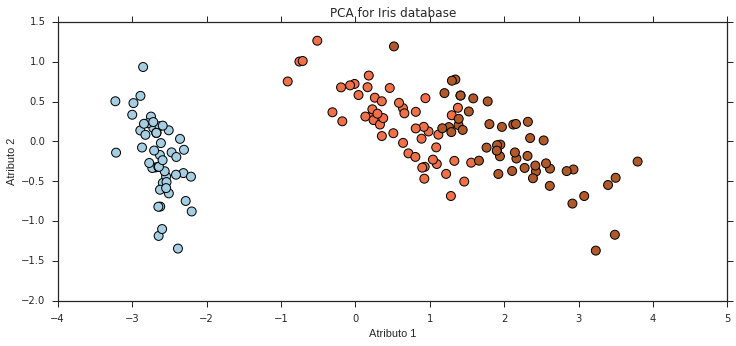

In [102]:
plt.figure(figsize=(12,5))
plt.scatter(reduced_X.values[:, 0], reduced_X.values[:, 1], c=y.values, cmap=plt.cm.Paired,
            edgecolors='k', s=80, linewidths=1)
plt.title('PCA for Iris database'); plt.xlabel('Atributo 1'); plt.ylabel('Atributo 2');
pass

## Selección de características ##

 Algoritmo                | Módulo                               | Comentario
 -------------------      | :-----------------------------       | ---------------------------
 Variance Threshold       | `feature_selection.VarianceThreshold`| Elimina aquellos atribulos con una varianza por debajo de un cierto umbral
 Estimadores univariantes | `feature_selection.GenericUnivariateSelect` | Emplea diferentes tests estadísticas para determinar la relevancia de los atributos
 Random Forests   | `tree.RandomForest`                  | Computa la relevancia de cada atributo
 Eliminacion recursiva  | `feature_selection.RFE`     | Elimina los P atributos menos relevantes de forma recursiva 
 Eliminacion recursiva con CV  | `feature_selection.RFECV`     | Elimina los atributos menos relevantes de forma recursiva. Estima P mediante validación cruzada

### *Ejemplo 2: Eliminación de atributos con RFE* ###

#### Reduccion de dimensionalidad con Linear SVM y RFE ####

In [103]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [104]:
# Instanciar Recursive Feature Elimination
n_atributos = 2
rfe  = RFE(estimator=LinearSVC(),            # Estimador
           n_features_to_select=n_atributos, # Numero de atributos final
           step=1)                           # Atributos a eliminar en cada pasada

In [105]:
# Ajustar y Transformar datos
reduced_X = rfe.fit_transform(X,y)

In [106]:
reduced_X = pd.DataFrame(reduced_X, columns=np.asarray(dataset.feature_names)[rfe.ranking_==1])

In [107]:
reduced_X.head()

sepal width (cm)  petal width (cm)
0               3.5               0.2
1               3.0               0.2
2               3.2               0.2
3               3.1               0.2
4               3.6               0.2

#### Scatter de los 2 atributos más relevantes ####

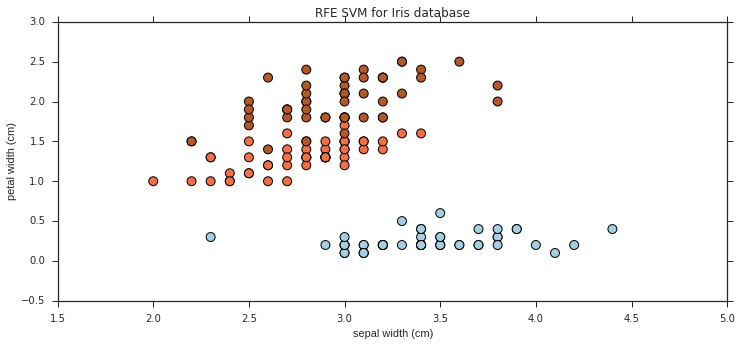

In [108]:
plt.figure(figsize=(12,5))
plt.scatter(reduced_X.values[:, 0], reduced_X.values[:, 1], c=y.values, cmap=plt.cm.Paired,
            edgecolors='k', s=80, linewidths=1)
plt.title('RFE SVM for Iris database'); plt.xlabel(reduced_X.columns[0]); plt.ylabel(reduced_X.columns[1]);

#### Al contrario que en Extracción de Características, en Selección los atributos **no cambian** ####

---------------------------------------------------------------------------------

# PIPELINES #

Las pipelines de *scikit-learn* constituyen una forma sencilla de encadenar operaciones. Mediante esta herramienta podemos aplicar tantas operaciones de transformación de los datos con clases que implementen el método `transform` para al final aplicar un estimador

### *Ejemplo: Clasificación de un dataset usando pipelines* ###
Supongamos que queremos crear un clasificador con SVM pero antes deseamos normalizar los datos. Podemos encadenar estas dos operaciones gracias a las Pipelines.

<center><img src="images/pipeline_flow.png" width="700"></center>

#### Creamos nuestro conjunto de datos ####

In [109]:
dataset = make_blobs(n_samples=1000,n_features=2,
                     centers=2,cluster_std=3.5,random_state=2)

X = pd.DataFrame(dataset[0])
y = pd.Series(dataset[1])

In [110]:
def plot_data():
    plt.figure(figsize=(12,5))
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y.values, cmap=plt.cm.Paired,
                edgecolors='k', s=80, linewidths=1)
    plt.title('Muestras aleatorias'); plt.xlabel('Atributo 1'); plt.ylabel('Atributo 2');

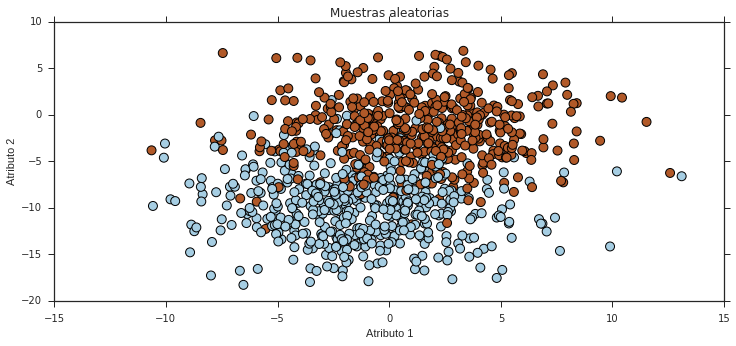

In [111]:
plot_data()

#### Encadenamos la normalización y la clasificación con un pipeline ####

In [112]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [113]:
std = StandardScaler()
nonscaled_svm = svm.SVC()

In [114]:
# Crear Pipeline
svm = Pipeline([('scaler', std), ('svc', nonscaled_svm)])

In [115]:
# Introducir parametros de la SVM
svm.set_params(svc__kernel='linear', svc__C=.1);

In [116]:
# Entrenar
svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

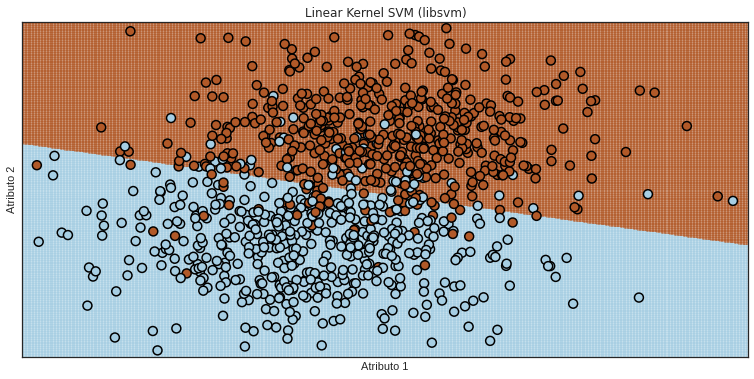

In [117]:
plot_decision_regions(svm,X,y,title='Linear Kernel SVM (libsvm)')

<center><img src="images/questions.png" width=500></center>